## Barreras de potencial

Se analizarán dos casos de interés acerca de los potenciales de barrera en estados no ligados:

$\mathbf{(a)}$ Tunneling

$\mathbf{(b)}$ Paquete Gaussiano.

Comienzo con los imports necesarios, así como la definición de la función animación

In [1]:
%matplotlib notebook

In [2]:
#Preliminares
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation 


In [3]:
#Animación

from matplotlib import animation

def animar(f,x0,xf,dx,t0,tf,dt, ym, yM):

    nf=int((xf-x0)/dx + 1)
    nt=int((tf-t0)/dt + 1)
    x=np.linspace(x0,xf,nf)
    t=np.linspace(t0,tf,nt)

    fig, ax=plt.subplots()
    ax.set_xlim((x0,xf))
    ax.set_ylim((ym,yM))
    line,=ax.plot([],[],lw=2)

    def init():
        line.set_data([],[])
        return (line,)

    def animate(i):
        y = f(x,i)
        line.set_data(x,y)
        return (line,)

    anim=animation.FuncAnimation(fig,animate,init_func=init,frames=t,interval=10,blit=True)
    plt.show()
    return anim

## Partícula libre: Tunneling

Se estudiará una partícula de masa $m=1$ a.u con energía $E$, la cual se aproxima a una barrera de potencial de ancho $L$ y altura $V_0$. Las funciones de onda serán:

\begin{align*}
\Psi^{I}(x,t)&=Ae^{i(kx-t)}+Be^{-i(kx+t)}\quad\quad x\in(-\infty,0)\\
\Psi^{II}(x,t)&=Ce^{bx-it}+Be^{-bx-it}\quad\quad\,\,\,\,\, x\in(0,L)\\
\Psi^{III}(x,t)&=Fe^{i(kx-t)}\quad\quad\quad\quad\quad\quad\,\, x\in(L,\infty)\\
\end{align*}
.

Las condiciones de contorno (continuidad de la función y su derivada) permiten expresar las constantes $B$, $C$, $D$ y $F$ en función de $A$:

\begin{align*}
B&=C+D-1\\
C&=\frac{F}{2}\left(1+i\frac{k}{b}\right)e^{L(ik-b)}\\
D&=\frac{F}{2}\left(i\frac{k}{b}-1\right)e^{L(ik+b)}\\
F&=\left[\cosh Lb+i\frac{(b^2-k^2)\sinh Lb}{2kb}\right]e^{-ik}
\end{align*}
.


In [4]:
#Variables a utilizar:

E=2
V=4

L=0.1

k=np.sqrt(2*E)
b=np.sqrt(2*(V-E))

#Amplitudes:
A=np.sqrt(2)
F=(np.exp(-1j*k)/(np.cosh(L*b)+1j*(b**2 - k**2)*np.sinh(L*b)/(2*k*b))) * A
C=((F/2)*(1+1j*k/b)*np.exp(L*(1j*k-b)))*A
D=((F/2)*(1-1j*k/b)*np.exp(L*(1j*k+b))) * A

B=C+D-A

x=np.linspace(-5,5,1000)


## Caso de una onda viajera:
Primero por comodidad simulo el caso de una onda viajera chocando contra una barrera de potencial de ancho L. Luego analizaré el caso de una partícula.

In [5]:
#Definición de la función de onda:

def psi1(x,t):
    M=np.zeros_like(x) # ------------------------------- Creamos un vector del tamaño de x (con todas sus coordenadas nulas)
    for i in range(1000): # ------------------------------------ Ahora rellenamos el vector que creamos según el valor de x
        if x[i]<0:
            M[i]=A*np.exp(1j*(k*x[i]-t))+B*np.exp(-1j*(k*x[i]+t))
        elif x[i]<L:
            M[i]=C*np.exp(b*x[i])*np.exp(-1j*t)+D*np.exp(-b*x[i])*np.exp(-1j*t)
        else:
            M[i]=F*np.exp(1j*(k*x[i]-t))
    return np.real(M)

#Definición del potencial

def V0(x):
    return V

def barrera(x):  # ---------------------------------------------------- Función partida con np.piecewise utilizando lambda
    return np.piecewise(x,[x<L,x>=L],[V0,lambda x: 0])

<ipython-input-5-0f21429983dc>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  M[i]=A*np.exp(1j*(k*x[i]-t))+B*np.exp(-1j*(k*x[i]+t))
<ipython-input-5-0f21429983dc>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  M[i]=C*np.exp(b*x[i])*np.exp(-1j*t)+D*np.exp(-b*x[i])*np.exp(-1j*t)
<ipython-input-5-0f21429983dc>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  M[i]=F*np.exp(1j*(k*x[i]-t))


<IPython.core.display.Javascript object>


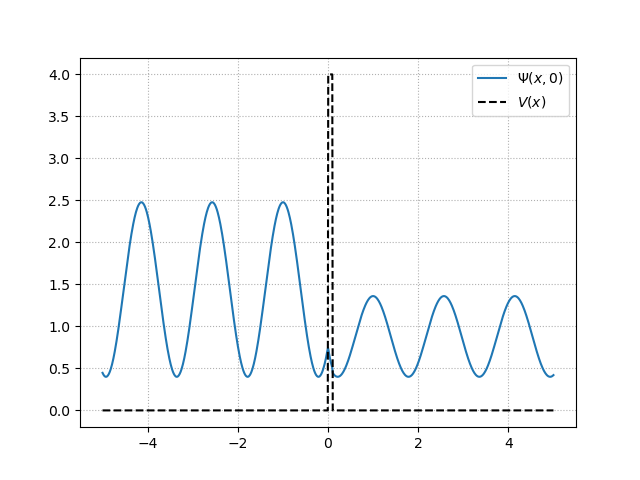

In [7]:
#Aquí graficamos la solución a t=0.

plt.plot(x,psi1(x,0)**2/2+0.1*V,label="$\Psi(x,0)$")
plt.plot(x,np.piecewise(x,[x<0,x>=0],[lambda x: 0, barrera]),"k--",label="$V(x)$")
plt.grid(True,linestyle=":")
plt.legend()
plt.show()
#(IMPORTANTE: por algún motivo, es necesario ejecutar varias veces esta celda hasta que funcione correctamente.)

## Paquete Gaussiano: Potencial escalón

Se estudiará ahora la interacción entre un paquete gaussiano y una pared de potencial en $x=0$ y altura $V_0$. Es de esperar que al alcanzar la pared, el paquete se refleje y a su vez se transmita.

<IPython.core.display.Javascript object>


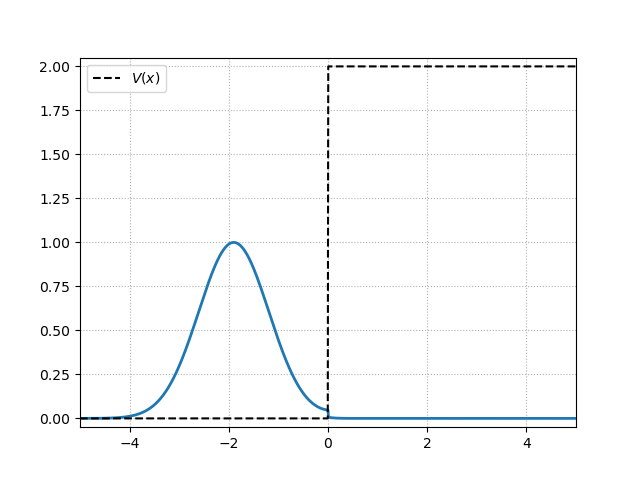

In [8]:
#Aquí la matemática es bastante cuestionable:

x=np.linspace(-5,5,1000)
V1=2

def gauss(x,t):  #--------------------------- Defino la gaussiana de a partes, para mostrar la reflejada y la transmitida
    g=np.zeros_like(x)
    for i in range(1000):
        if x[i]>0:
            g[i]=1/4*np.exp(-(2*x[i]-t)**2)
        else:
            g[i]=np.exp(-(x[i]-t)**2)+3/4*np.exp(-(t+x[i])**2)  # ------------- La mayoría de los valores son aleatorios
    return g

anim = animar(gauss,x0=-5,xf=5,dx=0.01,t0=-5,tf=13,dt=1./30, ym=-0.05, yM=2.05)  # ------------------------------- Animo
plt.plot(x,np.piecewise(x,[x<0,x>=0],[lambda x: 0, lambda x: V1]),"k--",label="$V(x)$")
plt.grid(True, linestyle=":")
plt.legend()
plt.show()

Este es el caso para una pared de potencial con una gaussiana sin sentido físico solo para probar el funcionamiento. Ahora lo resuelvo para el caso de una columna de potencial.

## Caso barrera de potencial finita:

<IPython.core.display.Javascript object>


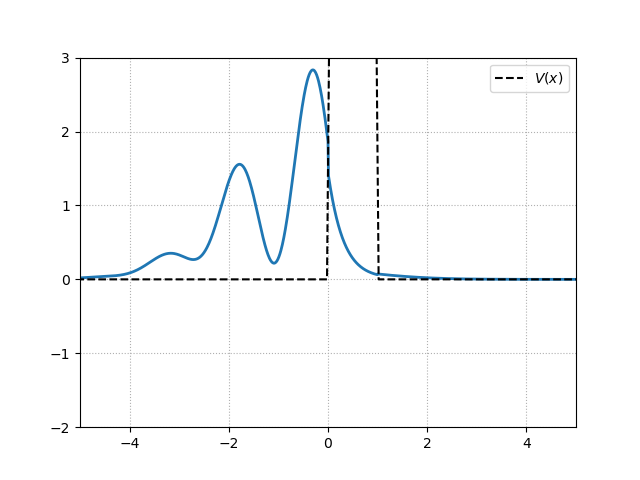

In [9]:
E=2
V=3
# Potencial barrera:
def V0(x):
    return V

def barrera(x):  # ---------------------------------------------------- Función partida con np.piecewise utilizando lambda
    return np.piecewise(x,[x<L,x>=L],[V0,lambda x: 0])

#k`s:
k=np.sqrt(2*E)
b=np.sqrt(2*(V-E))
L=1  # ancho de la barrera


#Amplitudes:
A=np.sqrt(1)

F = (np.exp(-1j*k)/(np.cosh(L*b) + 1j*((b**2 - k**2)*np.sinh(L*b)/(2*k*b))))*A
C=F/2*(1+1j*k/b)*np.exp(L*(1j*k-b))
D=F/2*(1-1j*k/b)*np.exp(L*(1j*k+b))
#C = (F/2)*(1j*k/b + 1)* np.exp(L*(1j*k - b)) 
#D = (F/2)*(1-1j*k/b)* np.exp(L*(1j*k + b))
B = C+D-A






omega = E/(2*np.pi) #frecuencia 
c = 2 # ancho de la gaussiana
v0 = 3 # Velocidad del pulso
p = 1/(2*(c **2))
def f1(x,t): # función incidente
    y4 = A * np.exp( 1j*(k*x - omega*t)) * np.exp(- p * (((x - v0*t))**2)) + B * np.exp(-1j* (k*x + omega*t)) * np.exp(- p * (((x + v0*t))**2))
    return y4 * np.conjugate(y4)

def f2(x,t): # función reflejada
    y5 = (F * np.exp(1j*(k*x - omega*t))) * np.exp(- p * (((x - v0*t))**2))
    return y5 * np.conjugate(y5)
def f3(x,t):        # función dentro de la barrera de potencial
    o =  ((C * np.exp(b *x) + D * np.exp( - b *x )) * np.exp(- 1j * omega * t)) * np.exp(- p * (((x - v0*t))**2))
    return np.real(o)
def f4(x,t):
    if 0 <= x <= L:
        return np.conjugate(f3(x,t)) * f3(x,t)
    else:
        return f4(x,t)
# Ahora creo la función que muestre el movimiento de la partícula.  



x = np.linspace(-10, 10, 1000) 
def partlibre2(x,t):
    g= np.zeros_like(x)
    for i in range(1000):
        if x[i]<=0:
            g[i] = f1(x[i],t)
            
        elif x[i] >= L:
            g[i] = f2(x[i],t)
            
        elif 0<=x[i]<=L:
            g[i] = f4(x[i],t)
                
        
       
            
        
    return g
x=np.linspace(-20,20,1000)
anim = animar(partlibre2,x0=-5,xf=5,dx=0.01,t0=-2,tf=2,dt=1./50, ym=-2, yM= 3)
plt.plot(x,np.piecewise(x,[x<0,x>=0],[lambda x: 0, barrera]),"k--",label="$V(x)$")
plt.grid(True, linestyle=":")
plt.legend()

plt.show()


<IPython.core.display.Javascript object>


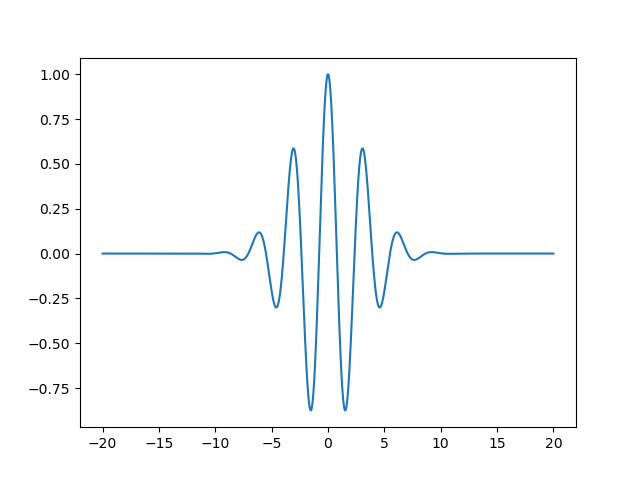

In [10]:
x = np.linspace(-20,20,1000)
c =3
def f7(x,t): # función incidente
    p = 1/(2*(c **2))
    y7 = A * np.exp( 1j*(k*x - omega*t)) * np.exp(- p * ((x - v0 * t)**2))
    return np.real(y7)


plt.plot(x,f7(x,0))
plt.show()